In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
def plot(optimization, baseline_stats, optimization_stats, max_epochs):

    plt.figure(figsize=(10, 5))
    
    label = {baseline_stats: "ViT Baseline", optimization_stats: f"ViT {optimization}"}
    
    for filename in [baseline_stats, optimization_stats]:
        with open(filename, 'r') as file:
            data = json.load(file)
            
            epoch = sorted([int(i) for i in list(data.keys())])[:max_epochs]
            acc = [data[str(i)] for i in epoch]
                
            plt.plot(epoch, acc, linewidth=1.5, label=label[filename])

    plt.xlabel('Epochs')
    plt.ylabel('Train Accuracy')
    plt.title('ViT-Baseline vs ViT DeCatt')
    plt.legend()
    plt.show()

## DeCatt Loss

### CIFAR10

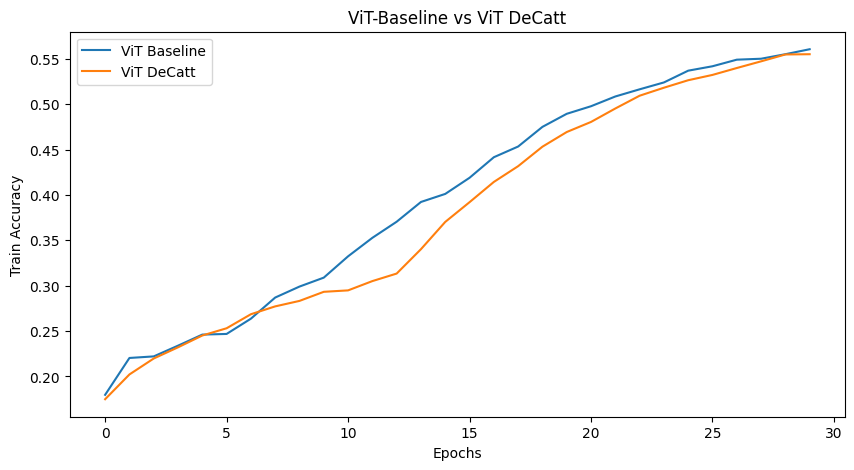

In [6]:
plot("DeCatt", "stats/vit_baseline_cifar10_trainacc.txt", "stats/vit_decatt_cifar10_trainacc.txt", 30)

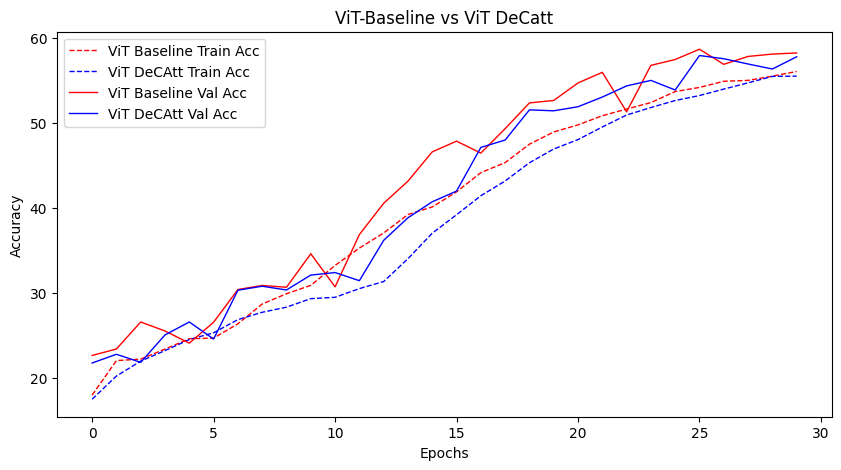

In [32]:
base_path = "stats"

max_epochs = 100
plt.figure(figsize=(10, 5))

label = {
    f"{base_path}/vit_baseline_cifar10_trainacc.txt": "ViT Baseline Train Acc", 
    f"{base_path}/vit_decatt_cifar10_trainacc.txt": "ViT DeCAtt Train Acc",
    f"{base_path}/vit_baseline_cifar10_valacc.txt":  "ViT Baseline Val Acc",
    f"{base_path}/vit_decatt_cifar10_valacc.txt":  "ViT DeCAtt Val Acc"
}

plot_col = {
    f"{base_path}/vit_baseline_cifar10_trainacc.txt": ["r", "--"], 
    f"{base_path}/vit_decatt_cifar10_trainacc.txt": ["b", "--"],
    f"{base_path}/vit_baseline_cifar10_valacc.txt": ["r", "-"],
    f"{base_path}/vit_decatt_cifar10_valacc.txt": ["b", "-"]
}

for filename in label.keys():
    with open(filename, 'r') as file:
        data = json.load(file)

        epoch = sorted([int(i) for i in list(data.keys())])[:max_epochs]
        acc = [data[str(i)] for i in epoch]
        if acc[0] < 1:
            acc = [100*i for i in acc]

        plt.plot(epoch, acc, color=plot_col[filename][0], linestyle=plot_col[filename][1], linewidth=1, label=label[filename])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ViT-Baseline vs ViT DeCatt')
plt.legend()
plt.show()

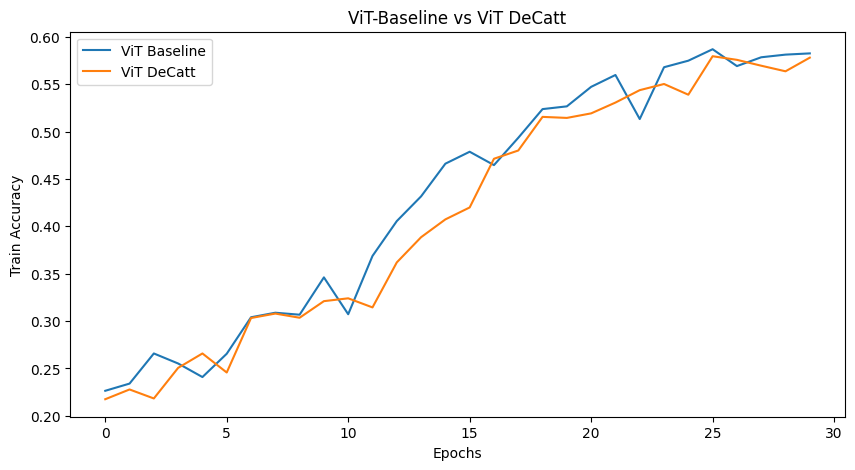

In [7]:
plot("DeCatt", "stats/vit_baseline_cifar10_valacc.txt", "stats/vit_decatt_cifar10_valacc.txt", 30)

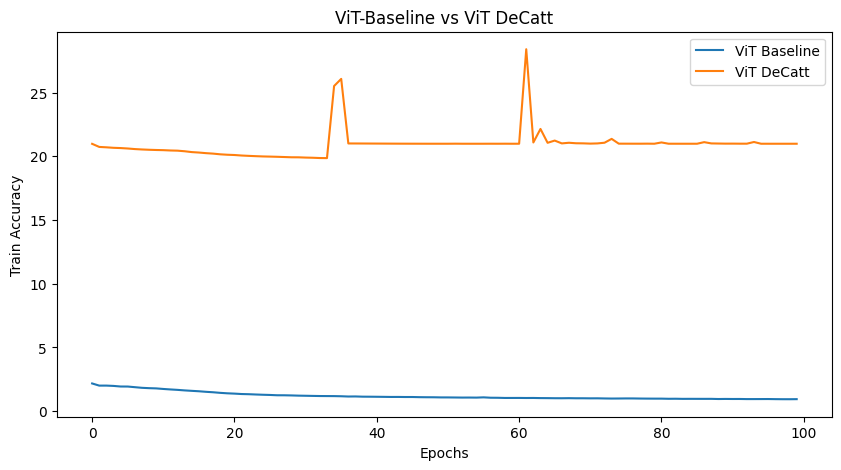

In [27]:
plot("DeCatt", f"stats/old2-decatt/vit_baseline_cifar10_trainloss.txt", f"stats/old2-decatt/vit_decatt_cifar10_trainloss.txt", 100)